In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import tensorflow as tf

In [3]:
import tensorflow.keras.preprocessing.image as img
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path1="/content/drive/MyDrive/Colab Notebooks/train"
path2="/content/drive/MyDrive/Colab Notebooks/dog cats/valid.zip /valid"

train=img.ImageDataGenerator(rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
test=img.ImageDataGenerator(rescale=1/255,
                            shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)


train=train.flow_from_directory(path1,
                                 target_size=(224,224),
                                batch_size=100,
                               class_mode='binary')
test=test.flow_from_directory(path2,
                               target_size=(224,224),
                               class_mode='binary')


Found 2212 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
model=tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 1s 0us/step


In [6]:
model.trainable=False
layer1=tf.keras.layers.Flatten()(model.output)
layer2=tf.keras.layers.Dense(100,activation='sigmoid')(layer1)
layer3=tf.keras.layers.Dense(1,activation='sigmoid')(layer2)
new_model=tf.keras.Model(inputs=model.input,outputs=layer3)
new_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=0.01,momentum=0.01),metrics='accuracy')
new_model.fit(train,epochs=20)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
23/23 [==============================] - 572s 24s/step - loss: 0.5494 - accuracy: 0.7328
Epoch 2/20
23/23 [==============================] - 27s 1s/step - loss: 0.5098 - accuracy: 0.7491
Epoch 3/20
23/23 [==============================] - 28s 1s/step - loss: 0.4748 - accuracy: 0.7572
Epoch 4/20
23/23 [==============================] - 27s 1s/step - loss: 0.4459 - accuracy: 0.7762
Epoch 5/20
23/23 [==============================] - 27s 1s/step - loss: 0.4169 - accuracy: 0.7884
Epoch 6/20
23/23 [==============================] - 27s 1s/step - loss: 0.3985 - accuracy: 0.8201
Epoch 7/20
23/23 [==============================] - 27s 1s/step - loss: 0.3914 - accuracy: 0.8174
Epoch 8/20
23/23 [==============================] - 27s 1s/step - loss: 0.3684 - accuracy: 0.8431
Epoch 9/20
23/23 [==============================] - 27s 1s/step - loss: 0.3616 - accuracy: 0.8513
Epoch 10/20
23/23 [==============================] - 27s 1s/step - loss: 0.3611 - accuracy: 0.8377
Epoch 11/20
23/23

In [7]:
model.trainable=True

In [8]:

new_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=np.math.exp(-5)),metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
new_model.fit(train,epochs=5)

Epoch 1/5
23/23 [==============================] - 50s 2s/step - loss: 0.3811 - accuracy: 0.8445
Epoch 2/5
23/23 [==============================] - 35s 2s/step - loss: 0.1545 - accuracy: 0.9471
Epoch 3/5
23/23 [==============================] - 36s 2s/step - loss: 0.1578 - accuracy: 0.9363
Epoch 4/5
23/23 [==============================] - 36s 2s/step - loss: 0.1552 - accuracy: 0.9417
Epoch 5/5
23/23 [==============================] - 36s 2s/step - loss: 0.0886 - accuracy: 0.9729


In [10]:
new_model.save('transfer_learning VGG16.h5')

In [11]:
new_model.evaluate(test)

63/63 [==============================] - 450s 7s/step - loss: 0.2248 - accuracy: 0.8985


[0.2247942090034485, 0.8985000252723694]

In [ ]:
import tensorflow.keras.preprocessing.image as img


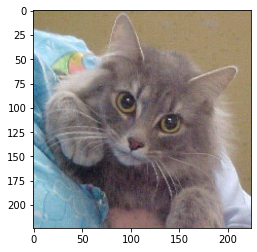

In [34]:
path1='/content/drive/MyDrive/Colab Notebooks/dog cats/valid.zip /valid/cats/cat.10349.jpg'
#path2='/content/drive/MyDrive/Colab Notebooks/dog cats/valid.zip /valid/dogs/dog.10018.jpg'
test_img=img.load_img(path1,target_size=(224,224))
plt.imshow(test_img)

In [35]:
test=img.img_to_array(test_img)

test=np.expand_dims(test,axis=0)

tf.shape(test)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  1, 224, 224,   3], dtype=int32)>

In [36]:
result=new_model.predict(test)
print(result)

if(result[0][0]<0.5):
    print("cat")
if(result[0][0]>0.5):
    print("dog")

[[0.00142396]]
cat
